<a href="https://colab.research.google.com/github/Nat-aho/net2020/blob/main/Semantic_Group/adjecency_matrix/matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Adjecency matrix

Given a list of $m$ documents $D = [d_1, d_2, \dots, d_m]$ and a vocabulary of $n$ words $W=[w_1, w_2, \dots, w_n]$, we create an $m \times n$ matrix $M$ where
* $M(i,j)=1\quad$ if document $d_i$ contains word $w_j$
* $M(i,j)=0\quad$ otherwise

In [1]:
docs = ['this is a really really really good cat ',
        'i love this good cat',
        'i really love books']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
count_vect = CountVectorizer(ngram_range=(1,1)) # default unigram model
M = count_vect.fit_transform(docs)
M[M>1] = 1

In [4]:
vocabulary = list(count_vect.get_feature_names())
vocabulary_dict = dict(zip(range(len(vocabulary)), vocabulary))
print(vocabulary_dict)

{0: 'books', 1: 'cat', 2: 'good', 3: 'is', 4: 'love', 5: 'really', 6: 'this'}


In [5]:
print(M.todense()) # print out matrix in dense format

[[0 1 1 1 0 1 1]
 [0 1 1 0 1 0 1]
 [1 0 0 0 1 1 0]]


From matrix $M$, we can get the adjecency matrix $A$ as follows:

$A = M^t \cdot M$

In [6]:
A = (M.T * M)
print(A.todense()) # print out matrix in dense format

[[1 0 0 0 1 1 0]
 [0 2 2 1 1 1 2]
 [0 2 2 1 1 1 2]
 [0 1 1 1 0 1 1]
 [1 1 1 0 2 1 1]
 [1 1 1 1 1 2 1]
 [0 2 2 1 1 1 2]]


## Words Graph

In [7]:
import matplotlib.pyplot as plt
import networkx as nx


def graph(adjacency_matrix, mylabels=None):
    G = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.Graph)
    layout = nx.spring_layout(G)
    nx.draw(G, layout, labels=mylabels, with_labels=True, node_size=1000, node_color="LightBlue", alpha=0.8)
    weights = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=weights)
    plt.show()

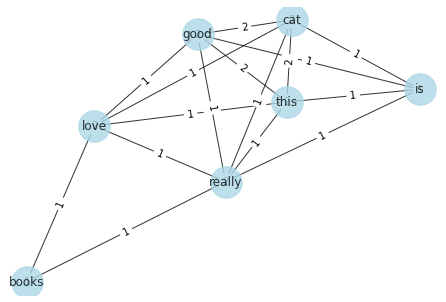

In [8]:
graph(A.todense(), vocabulary_dict)